# HW05 - Problem 6b

Performance evaluation. For each of the 3 datasets, train a decision tree and random forest and report your training and validation accuracies. You should be reporting 12 numbers (3 datasets × 2 classifiers × 2 data splits).


Program overhead:

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import numpy as np
import decisiontree as dt
import randomforest as rf
import HW05_utils as ut
from matplotlib import pyplot as plt

Set the base directory for this homework

In [6]:
BASE_DIR = "/Users/mitch/Documents/Cal/2_2017_Spring/COMPSCI 289A - Intro to Machine Learning/HW05/"

Establish a size for the validation set as a fraction of the total training set

In [7]:
valfrac = 0.1

In [8]:
def get_depth_acc(testtype,traindata,trainlabels,valdata,vallabels,treedepth,ntrees=None,mfeatures=None):
    
    # Pick the type of classifier
    if testtype == 'DT':
        classifier = dt.DecisionTree(treedepth)
    elif testtype == 'RF':
        classifier = rf.RandomForest(treedepth,ntrees,mfeatures)
        
    classifier.train(traindata,trainlabels)
    predictions = classifier.predict(valdata)
    valAcc = ut.val_accuracy(predictions,vallabels)
    
    return valAcc

In [9]:
def testdepths(testtype,traindata,trainlabels,valdata,vallabels,maxdepth,depthstep,ntrees=None,mfeatures=None):    
   
    depthAccs = np.empty((int(np.ceil(maxdepth/depthstep)),2))
    for depth in range(1,maxdepth+1,depthstep):
        if depth%5==0:
            print('Tested up to depth '+str(depth)+'...')
        Acc = get_depth_acc(testtype,traindata,trainlabels,valdata,vallabels,depth,ntrees,mfeatures)
        depthAccs[int(np.ceil(depth/depthstep))-1] = np.array([depth,Acc])
       
    return depthAccs

In [10]:
def plotdepthAccs(depthAccs,title):
    
    # Plot the Accuracy as a function of tree depth
    fig = plt.figure()
    plt.plot(depthAccs[:,0],depthAccs[:,1])
    plt.title(title)
    plt.xlabel('Validation Accuracy')
    plt.ylabel('Tree Depth')
    plt.ylim(0,1)
    plt.show()
    am = np.argmax(depthAccs[:,1])
    print('Max accuracy of %.2f%% for depth of %i' %(100*depthAccs[am,1],depthAccs[am,0]))
    

In [30]:
spamDT_Accs=testdepths('DT',spamtraindata,spamtrainlabels,spamvaldata,spamvallabels,maxdepth,depthstep)

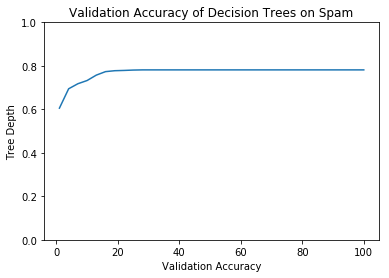

Max accuracy of 78.14% for depth of 28


In [31]:
plotdepthAccs(spamDT_Accs,'Validation Accuracy of Decision Trees on Spam')

Make decision tree predictions for the best depth according to test data, and save to a csv file for upload to Kaggle (0-indexing).

In [11]:
def train_optimal(classifiertype,Accs,data,labels,outfilename):
    
    # Create (or add to) an output file for the best trained algorithm
    outfile = open(outfilename,'w')
    outfile.write(outfilename+'\n')
    outfile.write((50*'=')+'\n\n')
    
    # Retrain the classifier on the best depth
    bestdepth = int(Accs[np.argmax(Accs[:,1]),0])
    outfile.write('Optimal Depth: '+str(bestdepth)+'\n')
    if classifiertype == 'DT':
        classifier = dt.DecisionTree(treedepth=bestdepth)
    elif classifiertype == 'RF':
        classifier = rf.RandomForest(treedepth=bestdepth,ntrees=100)
    classifier.train(data,labels)
    
    outfile.write('\n'+50*'-'+'\n\n\n')
    outfile.close()

    return classifier


def write_Accs(classifier,datasets,datasetslabels,datasetnames,outfilename):
    
    outfile = open(outfilename,'a')
    outfile.write('ACCURACIES\n'+50*'='+'\n\n')
    for ds_i in range(len(datasets)):
        dataset = datasets[ds_i]
        datasetlabels = datasetslabels[ds_i]
        datasetname = datasetnames[ds_i]
        
        # Write accuracies of an algorithm on dataset(s) to a file
        predictions = classifier.predict(dataset)
        valAcc = ut.val_accuracy(predictions,datasetlabels)
        outfile.write(datasetname+' Accuracy:\t  %0.4f\n' %(100*valAcc))
    
    outfile.write('\n'+50*'-'+'\n\n\n')
    outfile.close()

        
def make_kaggle(classifier,testset,indexing=0):
    # Use this optimal classifier on the test data
    predictions = classifier.predict(testset)
    if indexing == 0:
        ids = np.arange(len(predictions))
    elif indexing == 1:
        ids = np.arange(1,len(predicitions)+1)
    predictions_csv = np.concatenate(([ids],[predictions]),axis=0).T
    
    return predictions_csv

In [ ]:
spamDToutfilename ='../spamDT_accuracies.txt'
bestspamDT = train_optimal('DT',np.array([[28,1],[0,0]]),spamdata,spamlabels,spamDToutfilename)
#bestspamDT = train_optimal(spamDT_Accs,spamdata,spamlabels,spamoutfilename)
write_Accs(bestspamDT,
           [spamtraindata,spamvaldata],
           [spamtrainlabels,spamvallabels],
           ['Training','Validation'],
           spamDToutfilename,
          )

In [110]:
#spamDTpredictions_csv = save_optimal(spamDT_Accs,spamdata,spamlabels,spam_test,indexing=0)
#np.savetxt(BASE_DIR+'spam_DT_testpredictions.csv',spamDTpredictions_csv,fmt='%i',delimiter=',',header='Id,Category',comments='')

## Census
---------------------------
Calculate decision tree and random forest training/validation accuracies for the census dataset.

Begin by importing (preprocessed) data, shuffling, and separating into training and validation sets.

In [12]:
# Import
CENSDAT_PATH = "Data/census_traindata_vec.csv"
CENSLBL_PATH = "Data/census_traindata_lbl.csv"
CENSTST_PATH = "Data/census_testdata_vec.csv"

census_data = np.genfromtxt(BASE_DIR+CENSDAT_PATH,delimiter=',')
census_labels = np.genfromtxt(BASE_DIR+CENSLBL_PATH,delimiter=',')
census_test = np.genfromtxt(BASE_DIR+CENSTST_PATH,delimiter=',')

In [13]:
# Shuffle
census_labels = np.reshape(census_labels,(len(census_labels),1))
censusdata, censuslabels = ut.shuffle_data(census_data,census_labels)

In [14]:
# Separate
censustraindata,censusvaldata = ut.val_partition(censusdata,valfrac)
censustrainlabels,censusvallabels = ut.val_partition(censuslabels,valfrac)

### Census Decision Tree

Create and train a decision tree classifier using the census data and labels

In [28]:
census_DTclassifier = dt.DecisionTree(treedepth=8)

In [29]:
census_DTclassifier.train(censustraindata,censustrainlabels)

Calculate the validation accuracy using the trained decision tree

In [30]:
censuspredictions = census_DTclassifier.predict(censusvaldata)

In [31]:
censusvalAcc = ut.val_accuracy(censuspredictions,censusvallabels)
print('Validation Accuracy = %.3f%%'%(100*censusvalAcc))

Validation Accuracy = 81.601%


Use this procedure to determine the optimal value for the tree depth hyperparameter. (Re-use the functions for finding the optimal depth in spam)

In [32]:
maxdepth = 30
depthstep = 1

In [33]:
censusDT_Accs=testdepths('DT',censustraindata,censustrainlabels,censusvaldata,censusvallabels,maxdepth,depthstep)

Tested up to depth 5
Tested up to depth 10
Tested up to depth 15
Tested up to depth 20
Tested up to depth 25
Tested up to depth 30


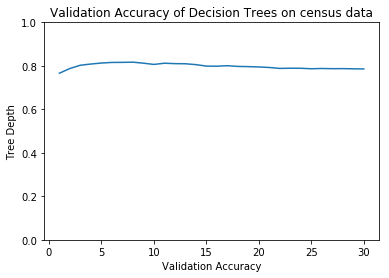

Max accuracy of 81.69% for depth of 8


In [34]:
plotdepthAccs(censusDT_Accs,'Validation Accuracy of Decision Trees on census data')

Make predictions for the test data, and save to a csv file for upload to Kaggle (1-indexing).

In [22]:
censusDToutfilename ='../censusDT_accuracies.txt'
bestcensusDT = train_optimal('DT',np.array([[8,1],[0,0]]),censusdata,censuslabels,censusDToutfilename)
#bestcensusDT = train_optimal(censusDT_Accs,censusdata,censuslabels,censusoutfilename)
write_Accs(bestcensusDT,
           [censustraindata,censusvaldata],
           [censustrainlabels,censusvallabels],
           ['Training','Validation'],
           censusDToutfilename,
          )

In [35]:
#censusDTpredictions_csv = save_optimal(censusDT_Accs,censusdata,censuslabels,census_test,indexing=0)
#np.savetxt(BASE_DIR+'census_DT_testpredictions.csv',censusDTpredictions_csv,fmt='%i',delimiter=',',header='Id,Category',comments='')

### Census Random Forest 

Create and train a random forest classifier using the census data and labels.

In [25]:
census_RFclassifier = rf.RandomForest(treedepth=8,ntrees=100)

In [26]:
census_RFclassifier.train(censustraindata,censustrainlabels)

Calculate the validation accuracy using the trained decision tree.

In [27]:
censuspredictions = census_RFclassifier.predict(censusvaldata)

In [28]:
censusvalAcc = ut.val_accuracy(censuspredictions,censusvallabels)    
print('Validation Accuracy = %.3f%%'%(100*censusvalAcc))

Validation Accuracy = 82.182%


Use this procedure to determine the optimal value for the tree depth hyperparameter. (Re-use the function looping over depths in spam)

In [29]:
maxdepth = 25
depthstep = 2

In [30]:
censusRF_Accs=testdepths('RF',censustraindata,censustrainlabels,censusvaldata,censusvallabels,maxdepth,depthstep,ntrees=100)

Tested up to depth 5...
Tested up to depth 15...
Tested up to depth 25...


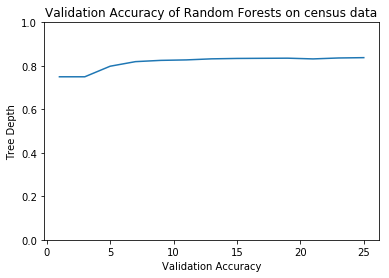

Max accuracy of 83.77% for depth of 25


In [31]:
plotdepthAccs(censusRF_Accs,'Validation Accuracy of Random Forests on census data')

In [15]:
censusRFoutfilename ='../censusRF_accuracies.txt'
bestcensusRF = train_optimal('RF',np.array([[20,1],[0,0]]),censusdata,censuslabels,censusRFoutfilename)
#bestcensusRF = train_optimal(censusRF_Accs,censusdata,censuslabels,censusoutfilename)
write_Accs(bestcensusRF,
           [censustraindata,censusvaldata],
           [censustrainlabels,censusvallabels],
           ['Training','Validation'],
           censusRFoutfilename,
          )

Finished training 0 tree(s) out of 100
Finished training 5 tree(s) out of 100
Finished training 10 tree(s) out of 100
Finished training 15 tree(s) out of 100
Finished training 20 tree(s) out of 100
Finished training 25 tree(s) out of 100
Finished training 30 tree(s) out of 100
Finished training 35 tree(s) out of 100
Finished training 40 tree(s) out of 100
Finished training 45 tree(s) out of 100
Finished training 50 tree(s) out of 100
Finished training 55 tree(s) out of 100
Finished training 60 tree(s) out of 100
Finished training 65 tree(s) out of 100
Finished training 70 tree(s) out of 100
Finished training 75 tree(s) out of 100
Finished training 80 tree(s) out of 100
Finished training 85 tree(s) out of 100
Finished training 90 tree(s) out of 100
Finished training 95 tree(s) out of 100


In [32]:
#censusRFpredictions_csv = save_optimal(censusRF_Accs,censusdata,censuslabels,census_test,indexing=0)
#np.savetxt(BASE_DIR+'census_RF_testpredictions.csv',censusRFpredictions_csv,fmt='%i',delimiter=',',header='Id,Category',comments='')